**<h2> DATA MANIPULATION & NAIVE BAYES CLASSIFIER WITH FLIGHTS DATESET <h2>**

<h3>

By [*Chris Le*](https://www.linkedin.com/in/hdang-le3107/)

<h3>

The aviation industry is dynamic with various variables impacting flight operations. A prominent airline company in the Pacific Northwest has accumulated extensive data related to flights and weather patterns and needs to understand the factors influencing the departure delays and cancellations to benefit both airlines and passengers. These datasets provide comprehensive information on flights departing in the first half of 2022 from both of the two major airports in this region: SEA (Seattle-Tacoma International Airport) and PDX (Portland International Airport):

This project seeks to analyze the `flights2022.csv` dataset containing *111,006* flight records and *29* fields.

The project consists of two parts:


<h3>
I. Data Manipulation, EDA and Visualizations <br>

II. Naive Bayes Classifier to Predict Flight Cancellations
<h3>

##### `flights2022.csv`

Contains information about each flight, including:


| **Column**           | **Data Type** | **Description**                                                                                                 | **Example Values**                 |
|----------------------|---------------|-----------------------------------------------------------------------------------------------------------------|------------------------------------|
| **year**             | int64         | Calendar year of the flight.                                                                                    | 2022                               |
| **month**            | int64         | Month of the flight (1–12).                                                                                     | 1, 2, ..., 12                      |
| **day**              | int64         | Day of the month (1–31).                                                                                        | 1, 2, 3, ...                       |
| **dep_time**         | float64       | Actual departure time in “HHMM” format (no colon). NA = cancelled flight. For example, 1.0 means 00:01, 2359 means 23:59.              | 1.0, 10.0, 25.0, 1305.0            |
| **sched_dep_time**   | int64         | Scheduled departure time in “HHMM” format.                                                                      | 2359, 2250, 2355                   |
| **dep_delay**        | float64       | Departure delay in minutes. Positive values = minutes late, negative = minutes early, zero = on time.           | 2.0, 71.0, 15.0                    |
| **arr_time**         | float64       | Actual arrival time in “HHMM” format (float).                                                                   | 604.0, 242.0, 759.0                |
| **sched_arr_time**   | int64         | Scheduled arrival time in “HHMM” format.                                                                        | 618, 142, 730                      |
| **arr_delay**        | float64       | Arrival delay in minutes. Positive = late arrival, negative = early arrival.                                    | -14.0, 60.0, 29.0                  |
| **carrier**          | object        | Two-letter airline carrier code.                                                                                | "UA", "AS", "AA"                   |
| **flight**           | int64         | Flight number assigned by the carrier.                                                                          | 1545, 15, 43                       |
| **tailnum**          | object        | Aircraft tail number (unique plane identifier).                                                                 | "N738MA", "N419AS"                 |
| **origin**           | object        | Origin airport where flight starts (IATA code).                                                                  | "JFK", "LGA", "EWR"                |
| **dest**             | object        | Destination airport where flight lands (IATA code).                                                                                      | "SEA", "SFO", "ORD"                |
| **air_time**         | float64       | Flight time in the air (minutes).                                                                               | 300.0, 200.0, etc.                 |
| **distance**         | int64         | Distance between airports (miles).                                                                              | 250, 800, 2475                     |
| **hour**             | int64         | Extracted hour portion of scheduled departure time (0–23).                                                      | 23, 22, etc.                       |
| **minute**           | int64         | Extracted minute portion of scheduled departure time (0–59).                                                    | 59, 50, etc.                       |
| **time_hour**        | object        | Scheduled departure (date/time) rounded to the nearest hour (stored here as text).                              | "2022-01-01 23:00:00"              |
| **airline**          | object        | Carrier/airline name.                                                                                              | "United Air Lines Inc.", "Alaska Airlines Inc." |
| **temp**             | float64       | Recorded temperature (in Fahrenheit) at the origin airport (from weather data).                                 | 33.0, 32.0, etc.                   |
| **dewp**             | float64       | Dew Point Temperature (in degrees Fahrenheit).                                                                             | 23.0, 19.0, etc.                   |
| **humid**            | float64       | Relative humidity percentage.                                                                                 | 66.06, 69.04, etc.                 |
| **wind_dir**         | float64       | Wind direction (in degrees, 0–360).                                                                             | 160.0, 170.0, etc.                 |
| **wind_speed**       | float64       | Wind speed (in mph).                                                                                            | 8.05546, 9.20624, etc.             |
| **wind_gust**        | float64       | Wind gust speed (in mph).                                                                                       | 9.270062, 10.594357, etc.          |
| **precip**           | float64       | Precipitation (in inches) recorded at departure airport.                                                        | 0.0, 0.5, etc.                     |
| **pressure**         | float64       | Atmospheric Pressure (in hPa).                                                                      | 1022.9, 1023.4, etc.               |
| **visib**            | float64       | Visibility (in miles).                                                                                          | 10.0, 4.0, etc.                    |




**<h3> `I. Handling NAs` <h3>**

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [51]:
df = pd.read_csv("flights2022.csv")
df.head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0
5,2022,1,1,51.0,2352,59.0,840.0,758,42.0,B6,366,N625JB,PDX,JFK,269.0,2454,23,52,2022-01-01T23:00:00Z,JetBlue Airways,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0
6,2022,1,1,104.0,43,21.0,936.0,930,6.0,AA,501,N413AN,SEA,MIA,312.0,2724,0,43,2022-01-01T00:00:00Z,American Airlines Inc.,25.0,14.0,62.50,350.0,8.05546,9.270062,0.0,1020.7,10.0
7,2022,1,1,131.0,2251,160.0,216.0,2347,149.0,QX,607,N444QX,SEA,PSC,32.0,172,22,51,2022-01-01T22:00:00Z,Horizon Air,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
8,2022,1,1,142.0,2305,157.0,900.0,657,123.0,UA,780,N37419,SEA,IAD,240.0,2306,23,5,2022-01-01T23:00:00Z,United Air Lines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
9,2022,1,1,255.0,2355,180.0,831.0,549,162.0,UA,784,N429UA,SEA,ORD,189.0,1721,23,55,2022-01-01T23:00:00Z,United Air Lines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0


In [52]:
num_rows = len(df)
print(f"Number of rows: {num_rows}")

Number of rows: 111006


In [53]:
df.isna().sum()

year                 0
month                0
day                  0
dep_time          2440
sched_dep_time       0
dep_delay         2440
arr_time          2537
sched_arr_time       0
arr_delay         2674
carrier              0
flight               0
tailnum            128
origin               0
dest                 0
air_time          2674
distance             0
hour                 0
minute               0
time_hour            0
airline              0
temp                 0
dewp                 0
humid                0
wind_dir          3163
wind_speed         279
wind_gust          279
precip               0
pressure             0
visib                0
dtype: int64

In [54]:
# Calculate percentage of missing values for each column
missing_percentage = (df.isna().sum() / len(df)) * 100

# Sort values in descending order and format to 2 decimal places
missing_percentage_sorted = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
missing_percentage_formatted = missing_percentage_sorted.apply(lambda x: f"{x:.2f}%")

print("Percentage of missing values per column:")
print(missing_percentage_formatted)

Percentage of missing values per column:
wind_dir      2.85%
arr_delay     2.41%
air_time      2.41%
arr_time      2.29%
dep_time      2.20%
dep_delay     2.20%
wind_speed    0.25%
wind_gust     0.25%
tailnum       0.12%
dtype: object


+ For dep_time, NAs represent "cancelled" flights so we don't have to worry about them 
+ dep_time is associated with dep_delay so the matching NAs makes sense
+ Since only relatively small amount of "tailnum" is missing, removing them is acceptable


In [55]:
# Remove records with blank (NA) in 'tailnum'
df = df[df['tailnum'].notna()]

In [56]:
df.isna().sum()

year                 0
month                0
day                  0
dep_time          2312
sched_dep_time       0
dep_delay         2312
arr_time          2409
sched_arr_time       0
arr_delay         2546
carrier              0
flight               0
tailnum              0
origin               0
dest                 0
air_time          2546
distance             0
hour                 0
minute               0
time_hour            0
airline              0
temp                 0
dewp                 0
humid                0
wind_dir          3161
wind_speed         279
wind_gust          279
precip               0
pressure             0
visib                0
dtype: int64

In [57]:
# Find rows where dep_time is not NA but arr_time is NA
missing_arrivals = df[df['dep_time'].notna() & df['arr_time'].isna()]

# Display the count and the relevant columns
print(f"Number of flights with missing arrival times: {len(missing_arrivals)}")
print("\nSample of these flights:")
missing_arrivals.head(5)

Number of flights with missing arrival times: 97

Sample of these flights:


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
466,2022,1,1,2255.0,2125,90.0,NaN,2335,NaN,AS,456,N291BT,SEA,SFO,NaN,679,21,25,2022-01-01T21:00:00Z,Alaska Airlines Inc.,32.0,21.9,65.92,160.0,9.20624,10.594357,0.00,1023.7,10.0
1076,2022,1,2,2341.0,2253,48.0,NaN,2354,NaN,QX,603,N452QX,SEA,ALW,NaN,213,22,53,2022-01-02T22:00:00Z,Horizon Air,41.0,33.0,73.25,140.0,9.20624,10.594357,0.00,1006.1,7.0
1183,2022,1,3,658.0,700,-2.0,NaN,1301,NaN,UA,541,N75432,SEA,ORD,NaN,1721,7,0,2022-01-03T07:00:00Z,United Air Lines Inc.,36.0,34.0,92.35,110.0,12.65858,14.567241,0.07,998.3,7.0
1215,2022,1,3,758.0,755,3.0,NaN,936,NaN,AS,33,N644AS,SEA,JNU,NaN,909,7,55,2022-01-03T07:00:00Z,Alaska Airlines Inc.,36.0,34.0,92.35,110.0,12.65858,14.567241,0.07,998.3,7.0
1297,2022,1,3,1030.0,900,90.0,NaN,1005,NaN,QX,723,N450QX,SEA,GEG,NaN,224,9,0,2022-01-03T09:00:00Z,Horizon Air,36.0,34.0,92.35,170.0,5.75390,6.621473,0.02,997.9,7.0


air_time, arr_time and arr_delay missing seems to have no pattern. Since only a small fraction is missing, it's reasonable to assume that there is a lag and the data wasn't updated timely. They wouldn't be used for modelling so it's fine to keep them as they are

In [58]:
# Display count of missing wind_dir_time and investigate those records
missing_windir_time = df[df['wind_dir'].isna()]
print(f"Number of flights with missing wind direction: {len(missing_windir_time)}")
print("\nSample of flights with missing wind direction:")
missing_windir_time.head(5)

Number of flights with missing wind direction: 3161

Sample of flights with missing wind direction:


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
1135,2022,1,3,56.0,2300,116.0,846.0,703,103.0,UA,743,N27421,PDX,EWR,260.0,2434,23,0,2022-01-03T23:00:00Z,United Air Lines Inc.,40.0,36.0,85.81,NaN,4.60312,5.297178,0.06,1003.9,9.0
1140,2022,1,3,128.0,2359,89.0,651.0,605,46.0,UA,849,N38459,PDX,IAH,187.0,1825,23,59,2022-01-03T23:00:00Z,United Air Lines Inc.,40.0,36.0,85.81,NaN,4.60312,5.297178,0.06,1003.9,9.0
1141,2022,1,3,133.0,2352,101.0,913.0,758,75.0,B6,366,N569JB,PDX,JFK,263.0,2454,23,52,2022-01-03T23:00:00Z,JetBlue Airways,40.0,36.0,85.81,NaN,4.60312,5.297178,0.06,1003.9,9.0
1277,2022,1,3,956.0,1000,-4.0,1224.0,1232,-8.0,AS,427,N291BT,SEA,LAS,115.0,867,10,0,2022-01-03T10:00:00Z,Alaska Airlines Inc.,36.0,34.0,92.35,NaN,3.45234,3.972884,0.12,997.8,6.0
1283,2022,1,3,1015.0,1014,1.0,1353.0,1354,-1.0,AS,230,N248AK,SEA,DEN,124.0,1024,10,14,2022-01-03T10:00:00Z,Alaska Airlines Inc.,36.0,34.0,92.35,NaN,3.45234,3.972884,0.12,997.8,6.0


In [59]:
from sklearn.impute import KNNImputer
import numpy as np

# Select columns needed for imputation
weather_cols = ['temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib']
weather_data = df[weather_cols].copy()

# Create KNN imputer
imputer = KNNImputer(n_neighbors=5, weights='distance')

# Fit and transform the data
weather_imputed = imputer.fit_transform(weather_data)

# Create a DataFrame with imputed values
weather_imputed_df = pd.DataFrame(weather_imputed, columns=weather_cols, index=df.index)

# Update the original dataframe with imputed values
df['wind_dir'] = weather_imputed_df['wind_dir']
df['wind_speed'] = weather_imputed_df['wind_speed']
df['wind_gust'] = weather_imputed_df['wind_gust']

# Verify imputation
print("Missing values after KNN imputation:")
print(df[weather_cols].isna().sum())

Missing values after KNN imputation:
temp          0
dewp          0
humid         0
wind_dir      0
wind_speed    0
wind_gust     0
precip        0
pressure      0
visib         0
dtype: int64


In [60]:
# Check for the number of rows after imputation, should be 111,006 - 128 = 110,878
len(df)

110878

**<h3> `II. Fixing Time Format` <h3>**

Exploring the data, we see that dep_time, sched_dep_time, arr_time, sched_dep_time need to be transformed for furthur analysis

#TODO:
+ transform int to HHMM format then to datetype
+ date inconsistency between dep_time and sched_dep_time for values near day transitions

In [61]:
df[['dep_time', 'sched_dep_time', 'dep_delay', 'year', 'month', 'day']].head(5)

,dep_time,sched_dep_time,dep_delay,year,month,day
0,1.0,2359,2.0,2022,1,1
1,1.0,2250,71.0,2022,1,1
2,10.0,2355,15.0,2022,1,1
3,25.0,2350,35.0,2022,1,1
4,35.0,2349,46.0,2022,1,1


Looking at the portion above, for the first record, we can see the dep_time and sched_dep_time don't make sense as they shouldn't occur on the same date. The dep_delay is 2 minutes, and the flight's departure is recorded to be 00:01 Jan 1, meaning the sched_dep_time should actually 1 day previous, 23:59 Dec 31 2022

In [62]:
df[df['dep_time'] == 2400][['dep_time', 'sched_dep_time', 'dep_delay','year', 'month', 'day']].head(5)

,dep_time,sched_dep_time,dep_delay,year,month,day
1086,2400.0,2246,74.0,2022,1,2
3354,2400.0,2253,67.0,2022,1,6
4553,2400.0,2150,130.0,2022,1,8
25932,2400.0,2359,1.0,2022,2,15
27087,2400.0,2359,1.0,2022,2,17


Additionally, these records above also need transformations, as dep_time of 24:00 should be written as 00:00 the day after

First, let's reformat the int date columns into datetime

In [63]:
# Create base datetime column from year, month, day
df['date'] = pd.to_datetime(
    df[['year', 'month', 'day']]
    .assign(day=1)
    .join(pd.Series(1, index=df.index, name='hour'))
)

# Function to convert HHMM to datetime
def hhmm_to_datetime(row, time_col):
    if pd.isna(row[time_col]):
        return pd.NaT

    # Convert HHMM to hours and minutes
    time_str = str(int(float(row[time_col]))).zfill(4)
    hours = int(time_str[:2])
    minutes = int(time_str[2:])

    # Get the base date from the row
    date = pd.to_datetime(row['date'])

    # Handle 24:00 times
    if hours >= 24:
        hours -= 24
        date += pd.Timedelta(days=1)

    # Create datetime using the adjusted date
    return date.replace(hour=hours, minute=minutes)

# Create datetime columns for time fields
time_columns = ['dep_time', 'sched_dep_time', 'arr_time', 'sched_arr_time']
for col in time_columns:
    df[f'{col}_datetime'] = df.apply(lambda row: hhmm_to_datetime(row, col), axis=1)

print("Sample of new time-based columns:")
display(
    df[
        [
            'dep_time_datetime',
            'sched_dep_time_datetime',
            'arr_time_datetime',
            'sched_arr_time_datetime',
            'arr_delay',
            'dep_delay',
            'year',
            'month',
            'day',
            'dep_time',
            'sched_dep_time',
            'arr_time',
            'sched_arr_time',
        ]
    ].head(6)
)

Sample of new time-based columns:


,dep_time_datetime,sched_dep_time_datetime,arr_time_datetime,sched_arr_time_datetime,arr_delay,dep_delay,year,month,day,dep_time,sched_dep_time,arr_time,sched_arr_time
0,2022-01-01 00:01:00,2022-01-01 23:59:00,2022-01-01 06:04:00,2022-01-01 06:18:00,-14.0,2.0,2022,1,1,1.0,2359,604.0,618
1,2022-01-01 00:01:00,2022-01-01 22:50:00,2022-01-01 02:42:00,2022-01-01 01:42:00,60.0,71.0,2022,1,1,1.0,2250,242.0,142
2,2022-01-01 00:10:00,2022-01-01 23:55:00,2022-01-01 07:59:00,2022-01-01 07:30:00,29.0,15.0,2022,1,1,10.0,2355,759.0,730
3,2022-01-01 00:25:00,2022-01-01 23:50:00,2022-01-01 06:06:00,2022-01-01 05:50:00,16.0,35.0,2022,1,1,25.0,2350,606.0,550
4,2022-01-01 00:35:00,2022-01-01 23:49:00,2022-01-01 06:16:00,2022-01-01 05:45:00,31.0,46.0,2022,1,1,35.0,2349,616.0,545
5,2022-01-01 00:51:00,2022-01-01 23:52:00,2022-01-01 08:40:00,2022-01-01 07:58:00,42.0,59.0,2022,1,1,51.0,2352,840.0,758


To address the day transition issue, we need to a condition where if dep_time_datetime is before 1AM and dep_delay > minutes of dep_time_datetime, sched_dep_time_datetime should keep the same hours but move back one day. Repeat the same process for arr

In [64]:
# Adjust scheduled departure time 
mask = (df['dep_time_datetime'].dt.hour < 1) & (df['dep_delay'] > df['dep_time_datetime'].dt.minute)
df.loc[mask, 'sched_dep_time_datetime'] = df.loc[mask, 'sched_dep_time_datetime'] - pd.Timedelta(days=1)

# Adjust scheduled arrival time
mask = (df['arr_time_datetime'].dt.hour < 1) & (df['arr_delay'] > df['arr_time_datetime'].dt.minute)
df.loc[mask, 'sched_arr_time_datetime'] = df.loc[mask, 'sched_arr_time_datetime'] - pd.Timedelta(days=1)

Departure Time Transformation

In [65]:
df[(df['dep_time_datetime'].dt.hour < 1) & (df['dep_delay'] > df['dep_time_datetime'].dt.minute)][['dep_time_datetime', 'sched_dep_time_datetime', 'dep_delay', 'date', 'year', 'month', 'day']]

,dep_time_datetime,sched_dep_time_datetime,dep_delay,date,year,month,day
0,2022-01-01 00:01:00,2021-12-31 23:59:00,2.0,2022-01-01 01:00:00,2022,1,1
1,2022-01-01 00:01:00,2021-12-31 22:50:00,71.0,2022-01-01 01:00:00,2022,1,1
2,2022-01-01 00:10:00,2021-12-31 23:55:00,15.0,2022-01-01 01:00:00,2022,1,1
3,2022-01-01 00:25:00,2021-12-31 23:50:00,35.0,2022-01-01 01:00:00,2022,1,1
4,2022-01-01 00:35:00,2021-12-31 23:49:00,46.0,2022-01-01 01:00:00,2022,1,1
...,...,...,...,...,...,...,...
109992,2022-06-01 00:19:00,2022-05-31 23:59:00,20.0,2022-06-01 01:00:00,2022,6,29
109995,2022-06-01 00:35:00,2022-05-31 23:57:00,38.0,2022-06-01 01:00:00,2022,6,29
110660,2022-06-01 00:01:00,2022-05-31 21:35:00,146.0,2022-06-01 01:00:00,2022,6,30
110661,2022-06-01 00:01:00,2022-05-31 23:32:00,29.0,2022-06-01 01:00:00,2022,6,30


Arrival Time Transformation

In [66]:
df[(df['arr_time_datetime'].dt.hour < 1) & (df['arr_delay'] > df['arr_time_datetime'].dt.minute)][['arr_time_datetime', 'sched_arr_time_datetime', 'arr_delay', 'date', 'year', 'month', 'day']]

,arr_time_datetime,sched_arr_time_datetime,arr_delay,date,year,month,day
306,2022-01-01 00:52:00,2021-12-31 23:59:00,53.0,2022-01-01 01:00:00,2022,1,1
332,2022-01-01 00:16:00,2021-12-31 23:58:00,18.0,2022-01-01 01:00:00,2022,1,1
372,2022-01-01 00:23:00,2021-12-31 23:58:00,25.0,2022-01-01 01:00:00,2022,1,1
376,2022-01-01 00:23:00,2021-12-31 23:57:00,26.0,2022-01-01 01:00:00,2022,1,1
402,2022-01-01 00:11:00,2021-12-31 22:42:00,89.0,2022-01-01 01:00:00,2022,1,1
...,...,...,...,...,...,...,...
110596,2022-06-01 00:34:00,2022-05-31 23:50:00,44.0,2022-06-01 01:00:00,2022,6,29
110599,2022-06-01 00:35:00,2022-05-31 23:16:00,79.0,2022-06-01 01:00:00,2022,6,29
110629,2022-06-02 00:00:00,2022-05-31 23:58:00,2.0,2022-06-01 01:00:00,2022,6,29
110630,2022-06-01 00:15:00,2022-05-31 23:59:00,16.0,2022-06-01 01:00:00,2022,6,29


Feature Engineering

In [67]:
# Create additional time-based features
df['day_of_week'] = df['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df['is_holiday'] = df['date'].dt.dayofweek.isin([5, 6]).astype(int)  # Simple weekend holiday flag
df['month_name'] = df['date'].dt.month_name()
df['season'] = df['date'].dt.month.map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

# Calculate flight duration in minutes using datetime columns
df['flight_duration'] = (
    df['arr_time_datetime'] - df['dep_time_datetime']
).dt.total_seconds() / 60

# Calculate scheduled flight duration in minutes
df['scheduled_duration'] = (
    df['sched_arr_time_datetime'] - df['sched_dep_time_datetime']
).dt.total_seconds() / 60

# Calculate difference between actual and scheduled flight durations
df['duration_difference'] = df['flight_duration'] - df['scheduled_duration']

# Create a "cancel" column based on NA values in dep_time
df['cancel'] = df['dep_time'].isna().astype(int)

# Create a "route" column that combines origin and dest
df['route'] = df['origin'] + ' - ' + df['dest']

# Remove redundant time columns
df.drop(['dep_time', 'sched_dep_time', 'arr_time', 'sched_arr_time'], axis=1, inplace=True)

# Reorder columns
column_order = [
    # Departure datetime info
    'dep_time_datetime',
    'sched_dep_time_datetime',
    'dep_delay',
    
    # Arrival datetime info
    'arr_time_datetime',
    'sched_arr_time_datetime',
    'arr_delay',
    
    # Date components
    'date',
    'year',
    'month',
    'day',
    
    # Flight info
    'carrier',
    'flight',
    'tailnum',
    'origin',
    'dest',
    'air_time',
    'distance',
    'hour',
    'minute',
    'time_hour',
    'airline',
    
    # Time-based features
    'day_of_week',
    'is_weekend',
    'is_holiday',
    'month_name',
    'season',
    'flight_duration',
    'scheduled_duration',
    'duration_difference',
    
    # Other features
    'cancel',
    'route',
    
    # Weather info
    'temp',
    'dewp',
    'humid',
    'wind_dir',
    'wind_speed',
    'wind_gust',
    'precip',
    'pressure',
    'visib'
]

df = df[column_order]

# Display a sample of the new columns
df.head(10)


,dep_time_datetime,sched_dep_time_datetime,dep_delay,arr_time_datetime,sched_arr_time_datetime,arr_delay,date,year,month,day,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline,day_of_week,is_weekend,is_holiday,month_name,season,flight_duration,scheduled_duration,duration_difference,cancel,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022-01-01 00:01:00,2021-12-31 23:59:00,2.0,2022-01-01 06:04:00,2022-01-01 06:18:00,-14.0,2022-01-01 01:00:00,2022,1,1,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,2022-01-01T23:00:00Z,United Air Lines Inc.,5,1,1,January,Winter,363.0,379.0,-16.0,0,SEA - IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022-01-01 00:01:00,2021-12-31 22:50:00,71.0,2022-01-01 02:42:00,2022-01-01 01:42:00,60.0,2022-01-01 01:00:00,2022,1,1,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,2022-01-01T22:00:00Z,Alaska Airlines Inc.,5,1,1,January,Winter,161.0,172.0,-11.0,0,SEA - FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022-01-01 00:10:00,2021-12-31 23:55:00,15.0,2022-01-01 07:59:00,2022-01-01 07:30:00,29.0,2022-01-01 01:00:00,2022,1,1,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,2022-01-01T23:00:00Z,Alaska Airlines Inc.,5,1,1,January,Winter,469.0,455.0,14.0,0,SEA - ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022-01-01 00:25:00,2021-12-31 23:50:00,35.0,2022-01-01 06:06:00,2022-01-01 05:50:00,16.0,2022-01-01 01:00:00,2022,1,1,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,2022-01-01T23:00:00Z,Alaska Airlines Inc.,5,1,1,January,Winter,341.0,360.0,-19.0,0,SEA - ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022-01-01 00:35:00,2021-12-31 23:49:00,46.0,2022-01-01 06:16:00,2022-01-01 05:45:00,31.0,2022-01-01 01:00:00,2022,1,1,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,2022-01-01T23:00:00Z,United Air Lines Inc.,5,1,1,January,Winter,341.0,356.0,-15.0,0,PDX - ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0
5,2022-01-01 00:51:00,2021-12-31 23:52:00,59.0,2022-01-01 08:40:00,2022-01-01 07:58:00,42.0,2022-01-01 01:00:00,2022,1,1,B6,366,N625JB,PDX,JFK,269.0,2454,23,52,2022-01-01T23:00:00Z,JetBlue Airways,5,1,1,January,Winter,469.0,486.0,-17.0,0,PDX - JFK,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0
6,2022-01-01 01:04:00,2022-01-01 00:43:00,21.0,2022-01-01 09:36:00,2022-01-01 09:30:00,6.0,2022-01-01 01:00:00,2022,1,1,AA,501,N413AN,SEA,MIA,312.0,2724,0,43,2022-01-01T00:00:00Z,American Airlines Inc.,5,1,1,January,Winter,512.0,527.0,-15.0,0,SEA - MIA,25.0,14.0,62.50,350.0,8.05546,9.270062,0.0,1020.7,10.0
7,2022-01-01 01:31:00,2022-01-01 22:51:00,160.0,2022-01-01 02:16:00,2022-01-01 23:47:00,149.0,2022-01-01 01:00:00,2022,1,1,QX,607,N444QX,SEA,PSC,32.0,172,22,51,2022-01-01T22:00:00Z,Horizon Air,5,1,1,January,Winter,45.0,56.0,-11.0,0,SEA - PSC,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
8,2022-01-01 01:42:00,2022-01-01 23:05:00,157.0,2022-01-01 09:00:00,2022-01-01 06:57:00,123.0,2022-01-01 01:00:00,2022,1,1,UA,780,N37419,SEA,IAD,240.0,2306,23,5,2022-01-01T23:00:00Z,United Air Lines Inc.,5,1,1,January,Winter,438.0,-968.0,1406.0,0,SEA - IAD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
9,2022-01-01 02:55:00,2022-01-01 23:55:00,180.0,2022-01-01 08:31:00,2022-01-01 05:49:00,162.0,2022-01-01 01:00:00,2022,1,1,UA,784,N429UA,SEA,ORD,189.0,1721,23,55,2022-01-01T23:00:00Z,United Air Lines Inc.,5,1,1,January,Winter,336.0,-1086.0,1422.0,0,SEA - ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0


**<h3> `II. EDA` <h3>**

Dataset shape: (110878, 29)

Data types summary:

Summary statistics for numeric columns:
           year          month            day      dep_delay      arr_delay  \
count  110878.0  110878.000000  110878.000000  108566.000000  108332.000000   
mean     2022.0       3.616651      15.660239       8.029162       2.344543   
std         0.0       1.707734       8.701649      41.597614      43.002019   
min      2022.0       1.000000       1.000000     -36.000000     -65.000000   
25%      2022.0       2.000000       8.000000      -5.000000     -14.000000   
50%      2022.0       4.000000      16.000000      -2.000000      -5.000000   
75%      2022.0       5.000000      23.000000       6.000000       6.000000   
max      2022.0       6.000000      31.000000    2120.000000    2098.000000   

              flight       air_time       distance           hour  \
count  110878.000000  108332.000000  110878.000000  110878.000000   
mean      433.326296     136.483486    1067.897148      13.1

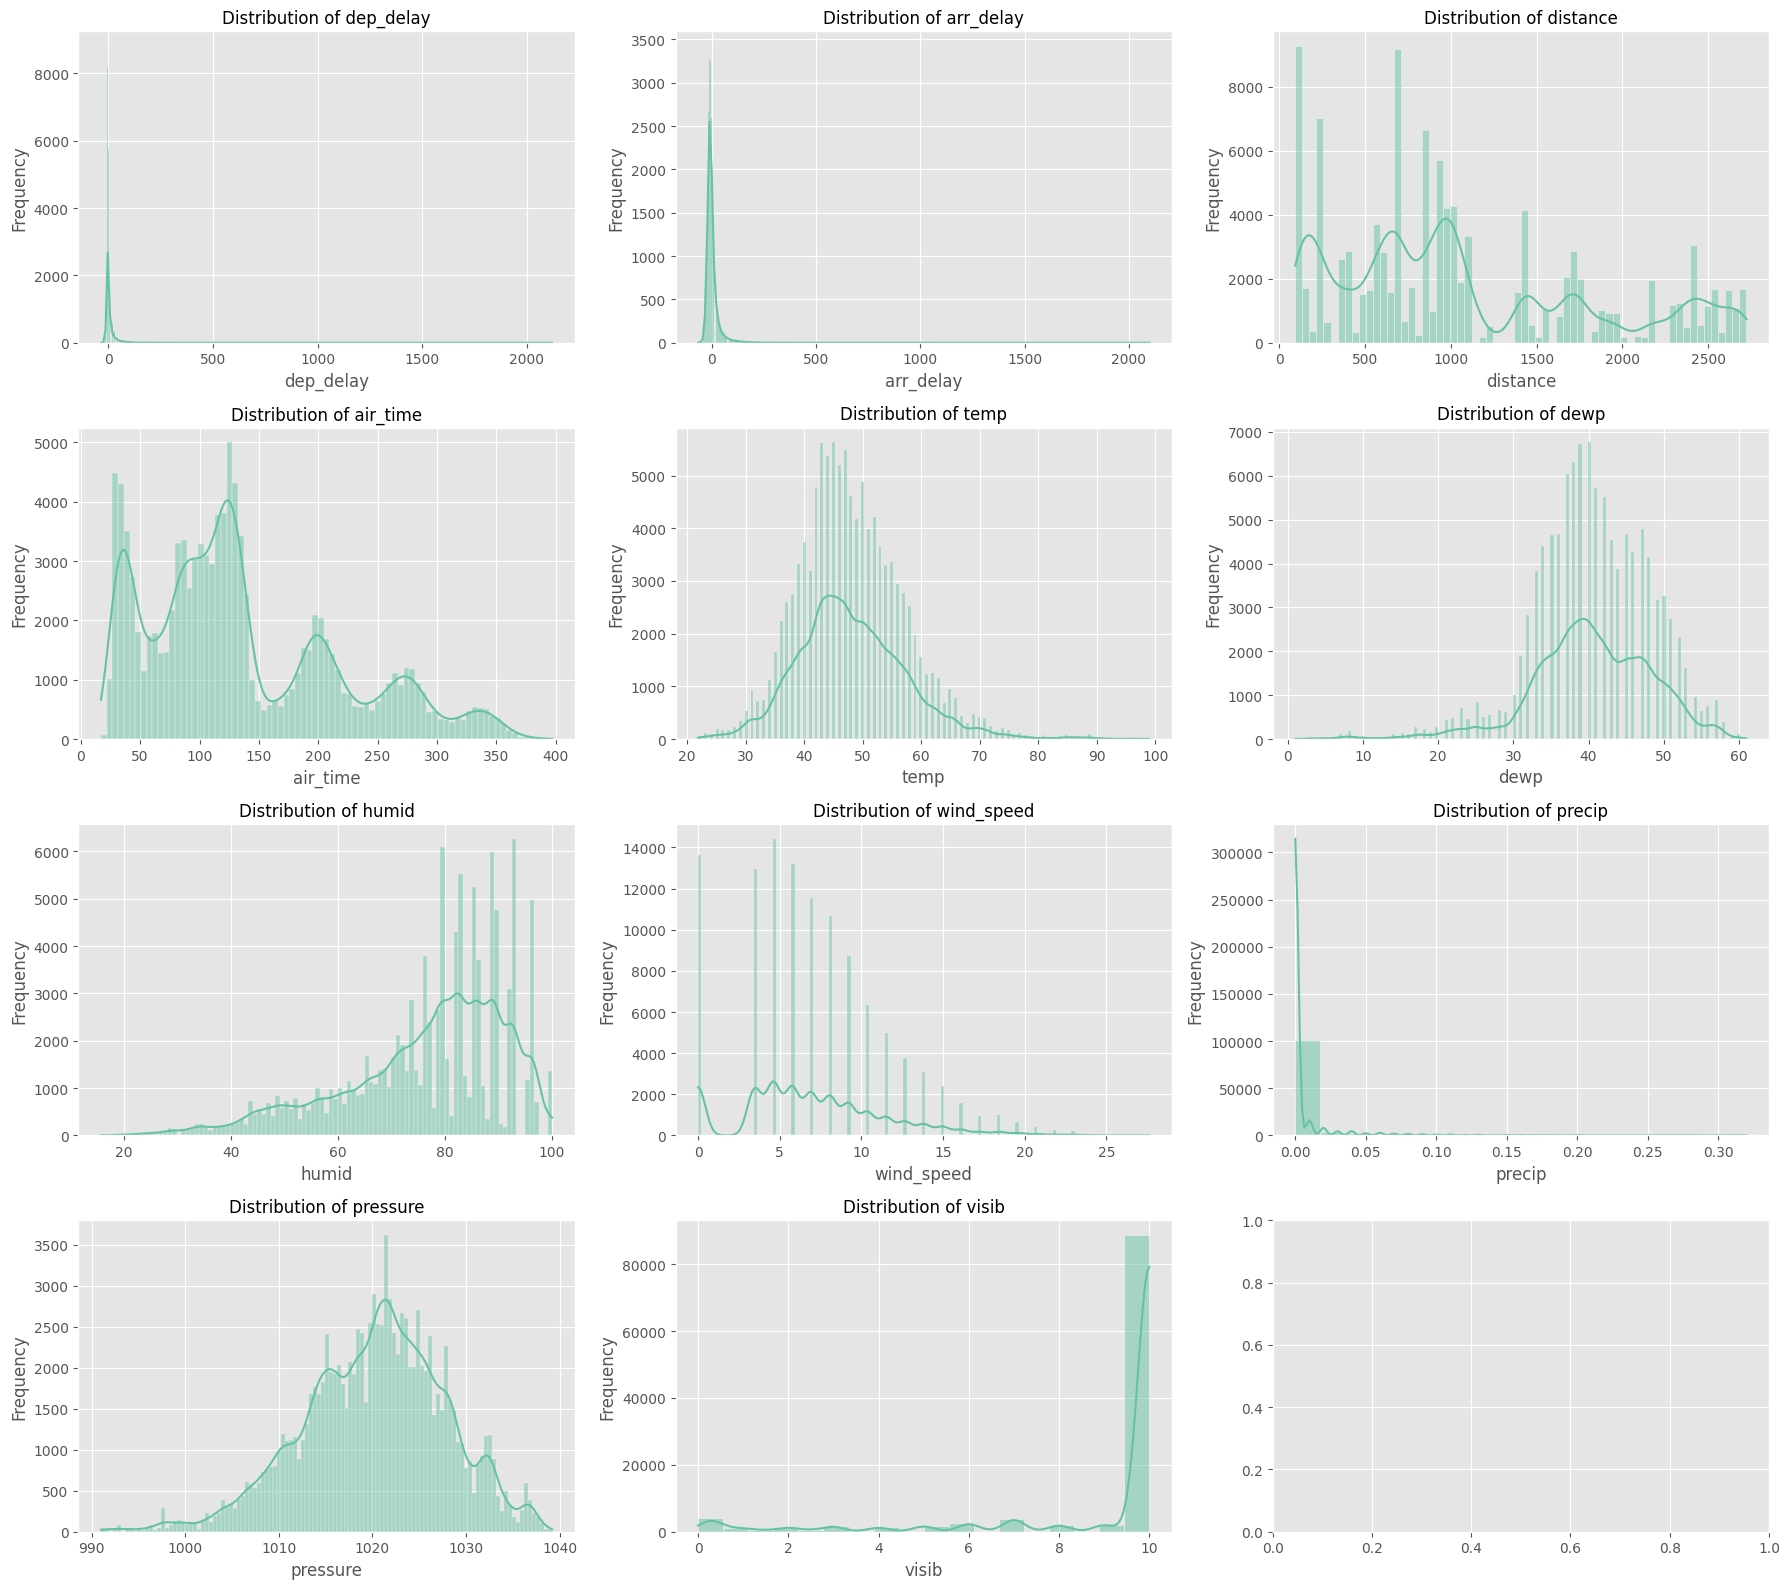

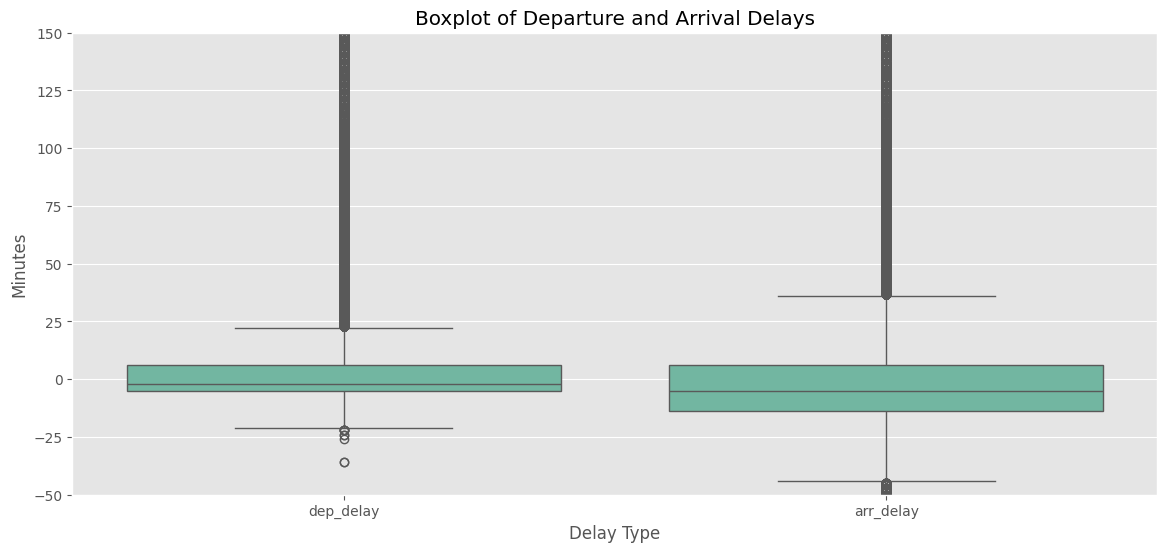

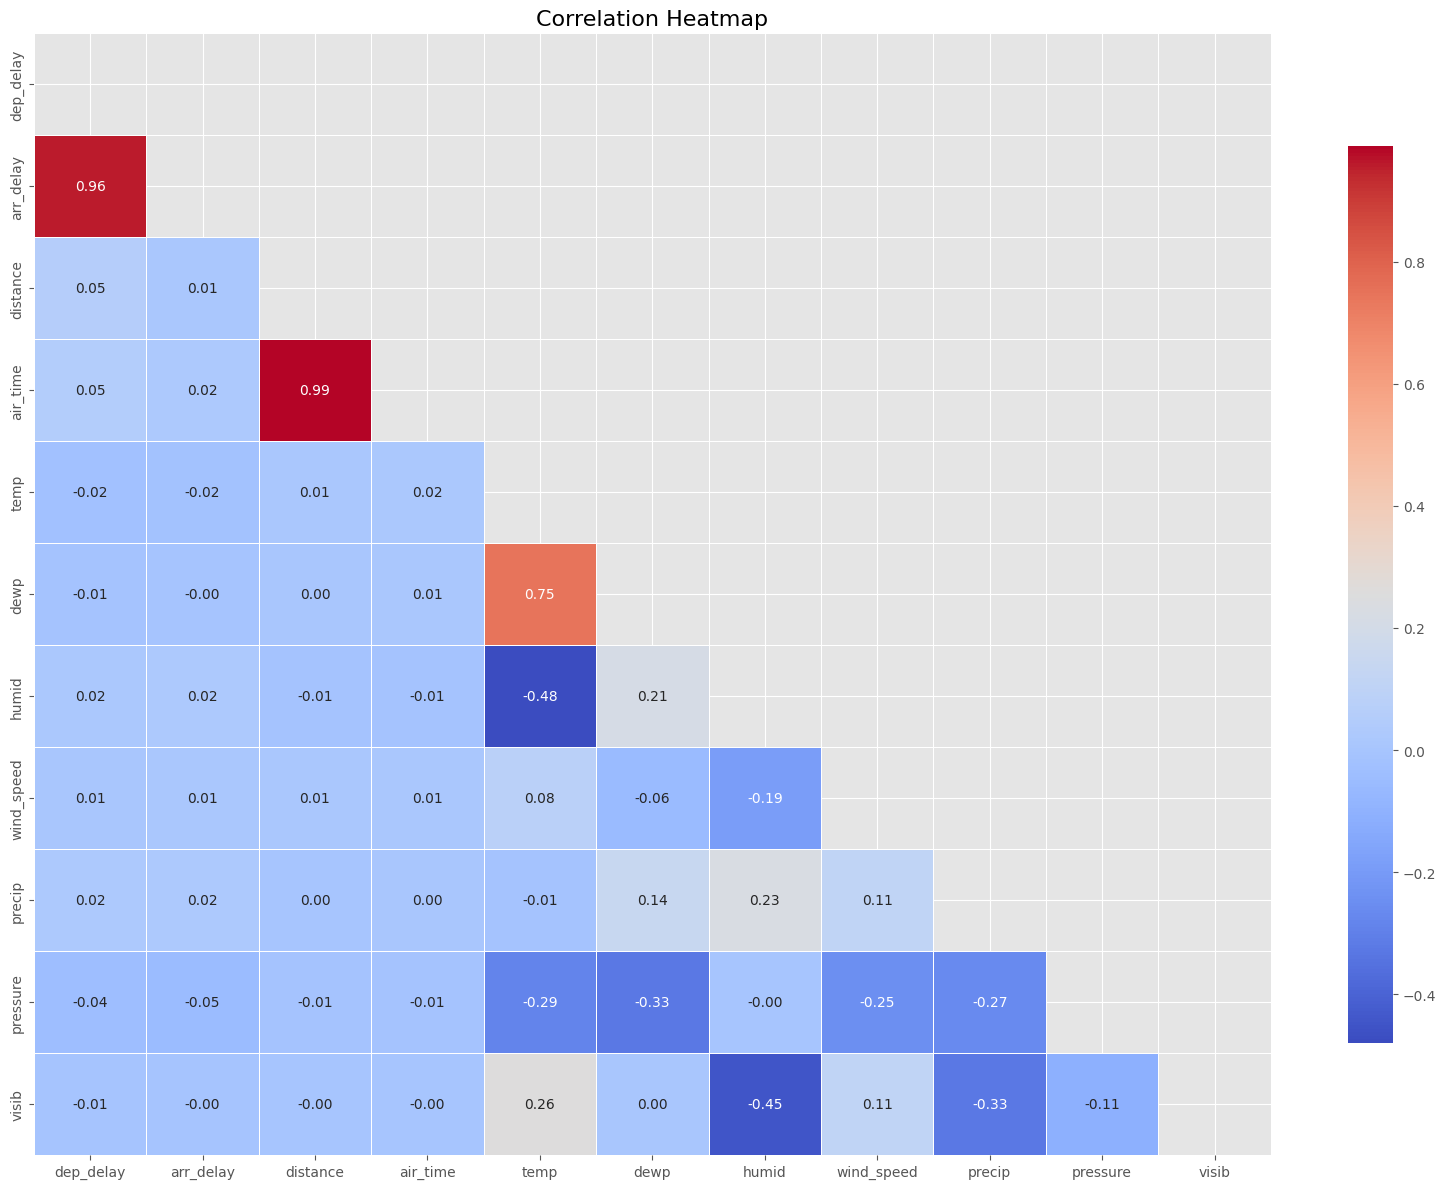

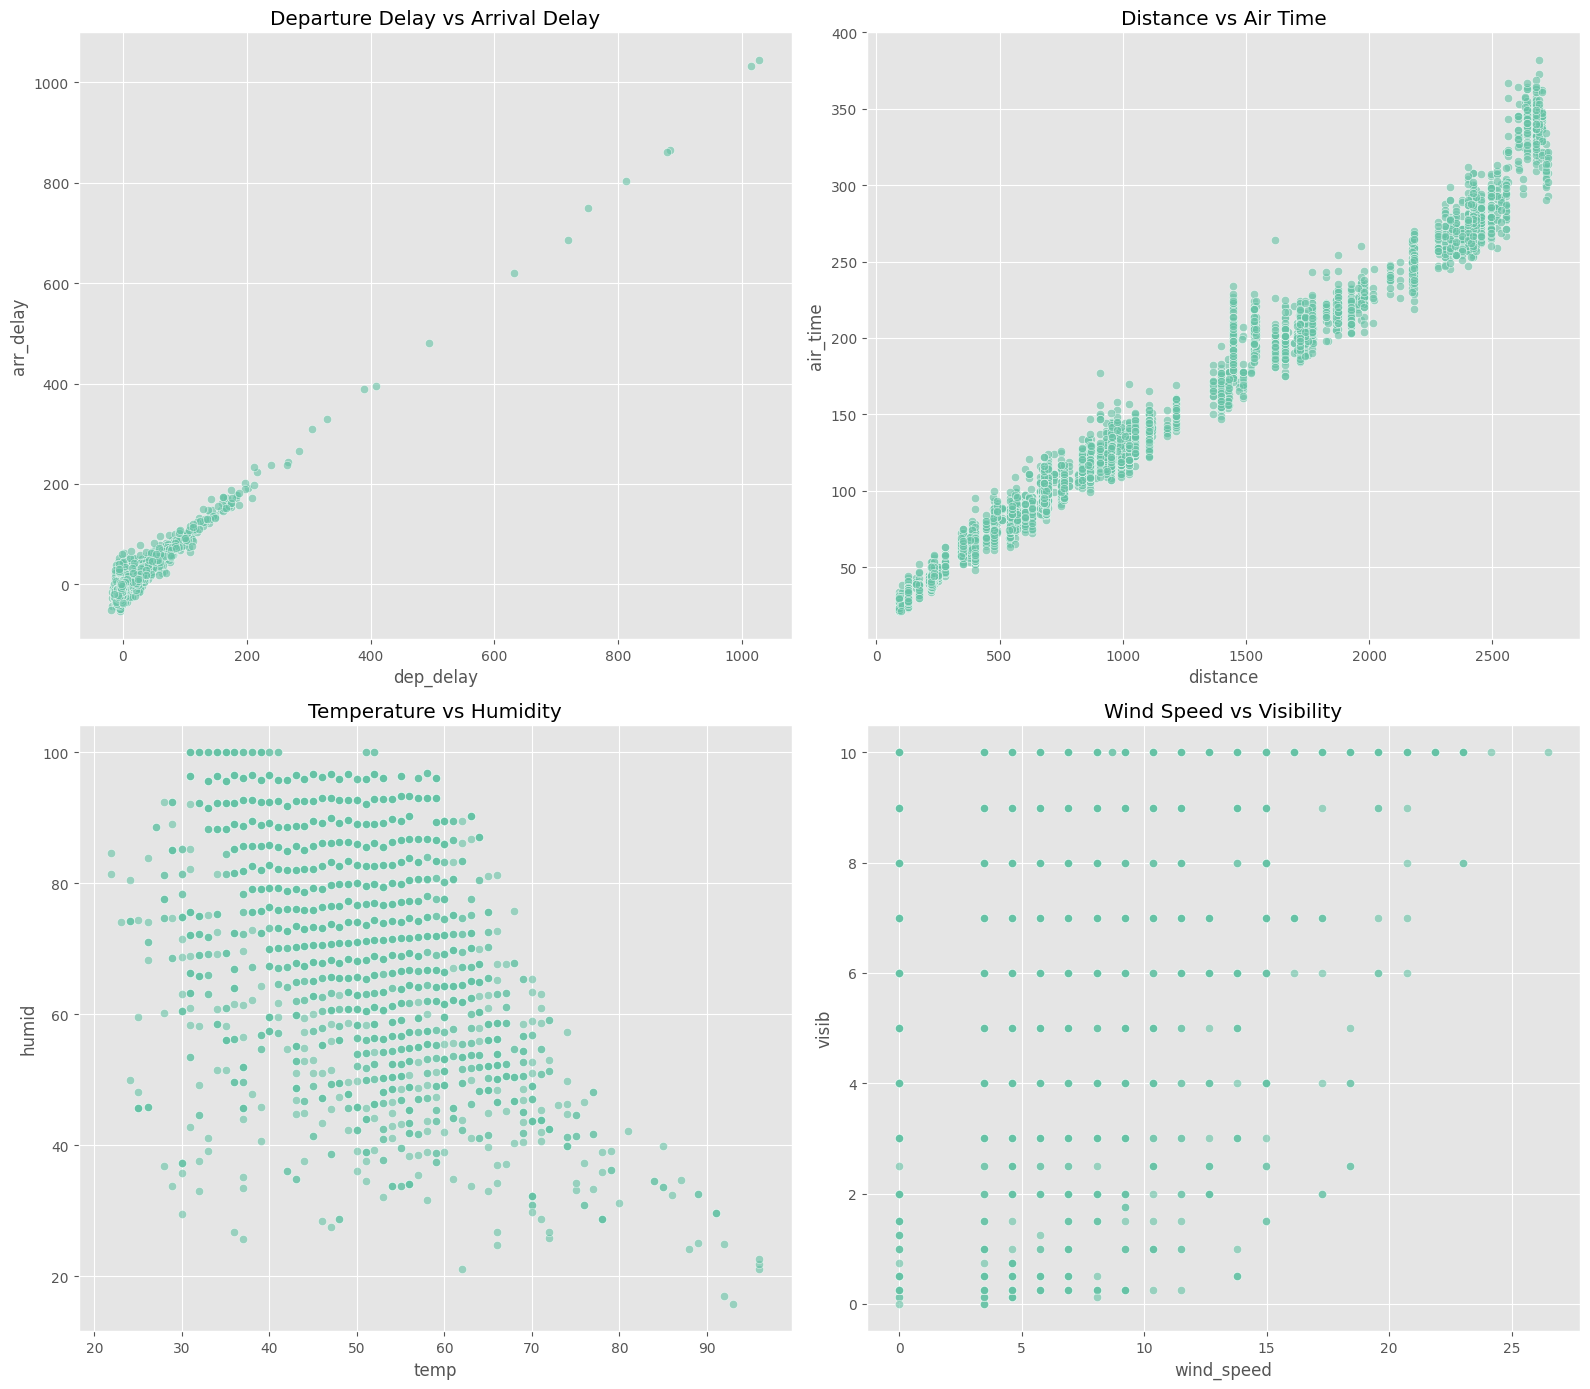

<Figure size 1200x600 with 0 Axes>

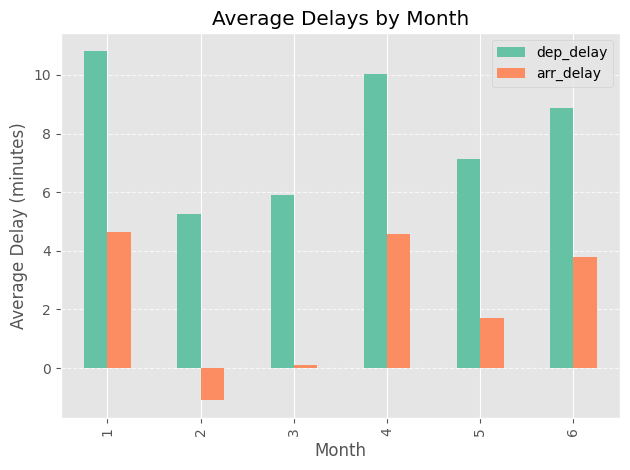

In [ ]:
import seaborn as sns
import numpy as np 

# Basic summary statistics
print("Dataset shape:", df.shape)
print("\nData types summary:")
df.dtypes.value_counts()

# Summary of numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nSummary statistics for numeric columns:")
print(df[numeric_cols].describe())

# Calculate mode for numeric columns
print("\nMode for numeric columns:")
for col in numeric_cols:
    mode_value = df[col].mode().values[0]
    print(f"{col}: {mode_value}")

# Visualization settings
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sns.set_palette("Set2")

# Create a function to create histograms
def plot_histograms(dataframe, columns, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(18, 16))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        if i < len(axes):  # Ensure we don't exceed the available axes
            sns.histplot(dataframe[col].dropna(), kde=True, ax=axes[i])
            axes[i].set_title(f'Distribution of {col}', fontsize=12)
            axes[i].set_ylabel('Frequency')
            
    plt.tight_layout()
    plt.show()

# Select important numeric columns for visualization
viz_cols = ['dep_delay', 'arr_delay', 'distance', 'air_time', 'temp', 
           'dewp', 'humid', 'wind_speed', 'precip', 'pressure', 'visib']

# Plot histograms
plot_histograms(df, viz_cols, 4, 3)

# Boxplots for key delay metrics
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[['dep_delay', 'arr_delay']].melt(), x='variable', y='value')
plt.title('Boxplot of Departure and Arrival Delays')
plt.xlabel('Delay Type')
plt.ylabel('Minutes')
plt.ylim(-50, 150)  # Limit y-axis to better see the main distribution
plt.show()

# Correlation heatmap
plt.figure(figsize=(16, 12))
correlation = df[viz_cols].corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', 
            mask=mask, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

# Scatter plots for important relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Relationship between departure delay and arrival delay
sns.scatterplot(x='dep_delay', y='arr_delay', data=df.sample(5000), 
                alpha=0.6, ax=axes[0, 0])
axes[0, 0].set_title('Departure Delay vs Arrival Delay')

# Relationship between distance and air time
sns.scatterplot(x='distance', y='air_time', data=df.sample(5000), 
                alpha=0.6, ax=axes[0, 1])
axes[0, 1].set_title('Distance vs Air Time')

# Temperature vs Humidity
sns.scatterplot(x='temp', y='humid', data=df.sample(5000), 
                alpha=0.6, ax=axes[1, 0])
axes[1, 0].set_title('Temperature vs Humidity')

# Wind Speed vs Visibility
sns.scatterplot(x='wind_speed', y='visib', data=df.sample(5000), 
                alpha=0.6, ax=axes[1, 1])
axes[1, 1].set_title('Wind Speed vs Visibility')

plt.tight_layout()
plt.show()

# Monthly average delays
monthly_delays = df.groupby('month')[['dep_delay', 'arr_delay']].mean()

plt.figure(figsize=(12, 6))
monthly_delays.plot(kind='bar')
plt.title('Average Delays by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:

df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,route
0,2022,1,1,0001,2359,2.0,0604,0618,-14.0,UA,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,SEA - IAH
1,2022,1,1,0001,2250,71.0,0242,0142,60.0,AS,...,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0,SEA - FAI
2,2022,1,1,0010,2355,15.0,0759,0730,29.0,AS,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,SEA - ATL
3,2022,1,1,0025,2350,35.0,0606,0550,16.0,AS,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,SEA - ORD
4,2022,1,1,0035,2349,46.0,0616,0545,31.0,UA,...,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0,PDX - ORD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111001,2022,6,30,1244,1250,-6.0,1835,1840,-5.0,AS,...,56.0,51.0,83.88,30.0,9.20624,10.594357,0.0,1021.5,10.0,SEA - DFW
111002,2022,6,30,1245,1240,5.0,1446,1450,-4.0,AS,...,60.0,53.0,77.65,20.0,6.90468,7.945768,0.0,1021.9,10.0,SEA - FAT
111003,2022,6,30,1246,1235,11.0,1645,1615,30.0,AS,...,65.0,53.0,65.56,280.0,6.90468,7.945768,0.0,1021.3,10.0,SEA - DEN
111004,2022,6,30,1250,1239,11.0,1636,1626,10.0,UA,...,56.0,51.0,83.88,30.0,9.20624,10.594357,0.0,1021.5,10.0,SEA - DEN


In [ ]:
# def detect_outliers_iqr(data):
#     Q1 = data.quantile(0.25)
#     Q3 = data.quantile(0.75)
#     IQR = Q3 - Q1
#     outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
#     return outliers
# len(detect_outliers_iqr(df['precip']))

In [ ]:


# By default NA values are excluded from group keys during the Pandas groupby operation
#Counting number of cancelled flights and mean departure delay time by routes
routes_delays_cancels = df.groupby("route").agg(avg_delay = ("dep_delay", "mean"), no_cancelled = ("cancel", "sum"))

# Counting number of cancelled flights and mean delay time by airlines
airlines_delays_cancels = df.groupby("airline").agg(avg_delay = ("dep_delay", "mean"), no_cancelled = ("cancel", "sum"))

print(routes_delays_cancels, airlines_delays_cancels)

           avg_delay  no_cancelled
route                             
PDX - ABQ   0.611842             2
PDX - ANC   4.748936             4
PDX - ATL   7.050967            13
PDX - AUS   5.435374             5
PDX - BOI   5.165939             7
...              ...           ...
SEA - STS   6.397333             5
SEA - SUN   5.735537             5
SEA - TPA   6.553015            20
SEA - TUS   6.180608            13
SEA - YKM   5.460000            11

[149 rows x 2 columns]                         avg_delay  no_cancelled
airline                                        
Alaska Airlines Inc.     6.751572          1300
Allegiant Air           26.255556             2
American Airlines Inc.  19.913783            85
Delta Air Lines Inc.    10.626629           379
Frontier Airlines Inc.  14.427602             0
Hawaiian Airlines Inc.   8.186207             0
Horizon Air              6.253491           238
JetBlue Airways         42.203762            33
SkyWest Airlines Inc.    4.612112        

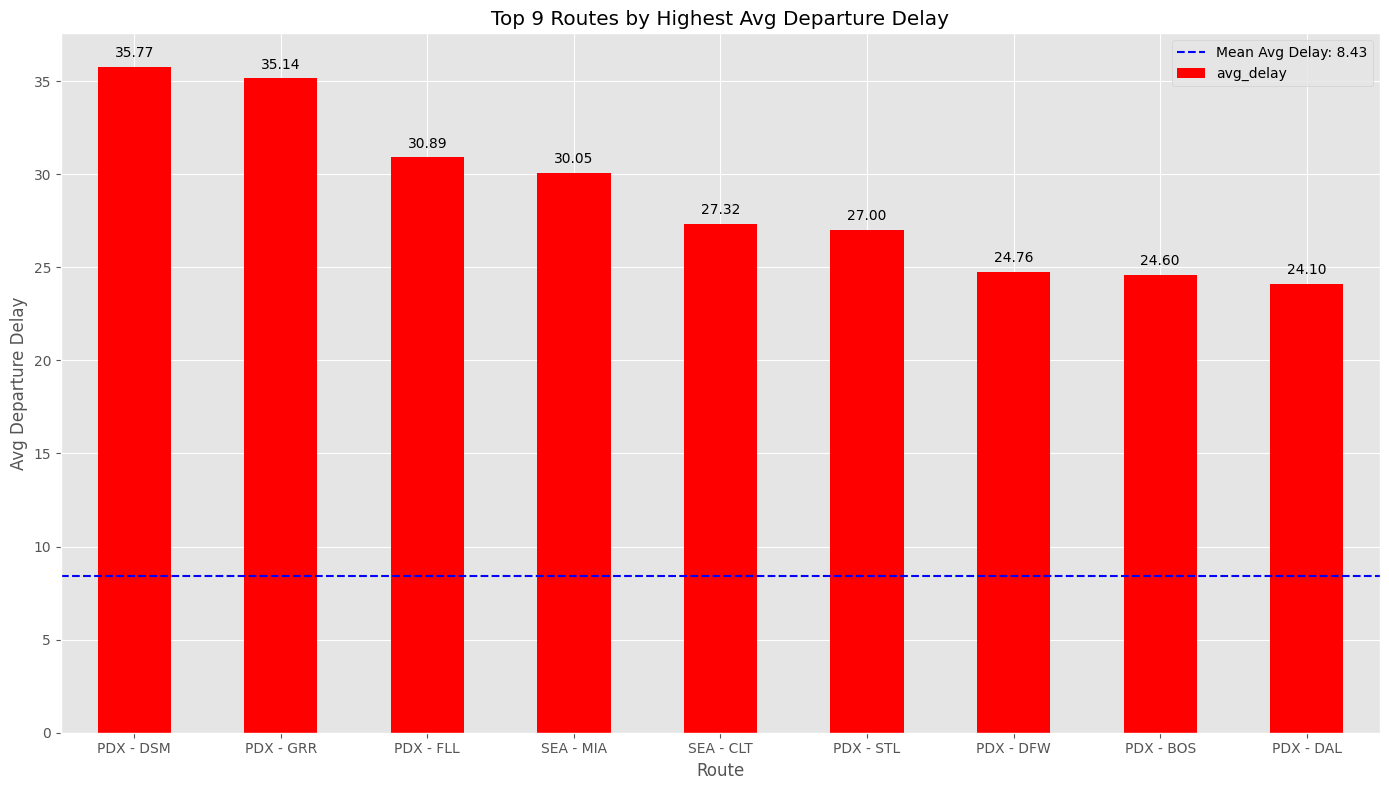

In [ ]:
top9_routes_delays = routes_delays_cancels.nlargest(n = 9, columns = "avg_delay").iloc[:,0]     # Sort Top 9 by Avg Delay column, slicing df

mean_delay = routes_delays_cancels['avg_delay'].mean()

plt.figure(figsize= (14, 8))
bar1 = top9_routes_delays.plot(kind="bar", color="red")
plt.title("Top 9 Routes by Highest Avg Departure Delay")
plt.xlabel("Route")
plt.ylabel("Avg Departure Delay")
plt.xticks(rotation=0)

plt.axhline(y=mean_delay, color='blue', linestyle='--', label=f'Mean Avg Delay: {mean_delay:.2f}')


for i in bar1.patches:
    bar1.annotate(f'{i.get_height():.2f}',                                                      # Get data label, specify 2 decimals
                (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.legend()
plt.tight_layout()
plt.show()

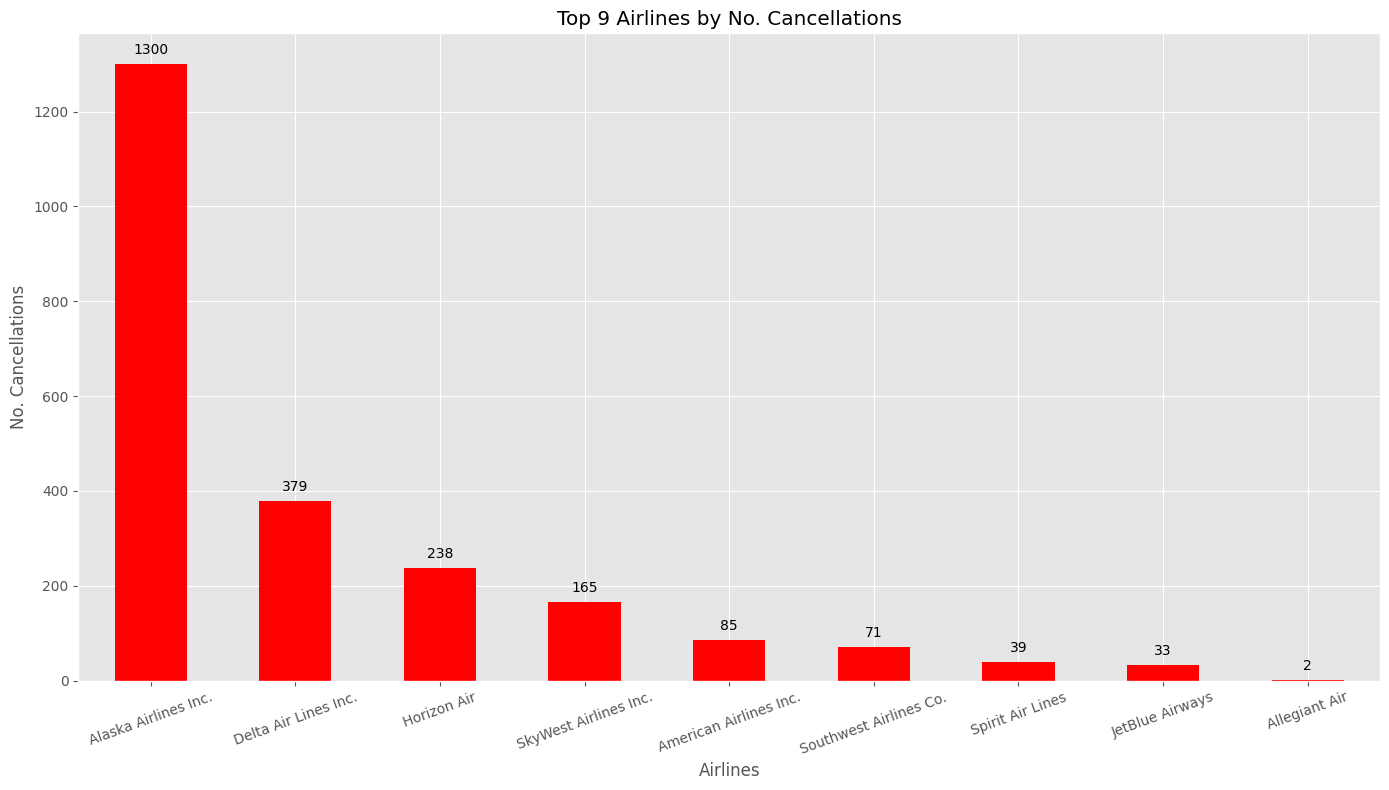

In [ ]:
top9_airlines_cancel = airlines_delays_cancels.nlargest(n = 9, columns = "no_cancelled").iloc[:,1]
plt.figure(figsize=(14, 8))
bar2 = top9_airlines_cancel.plot(kind="bar", color="red")
plt.title("Top 9 Airlines by No. Cancellations")
plt.xlabel("Airlines")
plt.ylabel("No. Cancellations")
plt.xticks(rotation = 20)
for i in bar2.patches:
    bar2.annotate(i.get_height(),                                                      # Get data label
                (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.tight_layout()
plt.show()

In [ ]:
# Selecting features and target variable
X = df[["distance", "temp", "dewp", "humid", "pressure","precip", "visib"]]
Y = df["cancel"]

#"month", "day", "sched_dep_time"

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train_scaled, y_train)

# Predicting the Test set results
y_pred = gnb.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generating the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
print(X)


Accuracy: 0.9596861471861472
Confusion Matrix:
[[21256   454]
 [  440    26]]
        distance  temp  dewp  humid  pressure  precip  visib
0           1874  33.0  23.0  66.06    1022.9     0.0   10.0
1           1533  32.0  23.0  69.04    1023.4     0.0   10.0
2           2182  33.0  23.0  66.06    1022.9     0.0   10.0
3           1721  33.0  23.0  66.06    1022.9     0.0   10.0
4           1739  33.0  19.0  55.75    1025.1     0.0   10.0
...          ...   ...   ...    ...       ...     ...    ...
111001      1660  56.0  51.0  83.88    1021.5     0.0   10.0
111002       748  60.0  53.0  77.65    1021.9     0.0   10.0
111003      1024  65.0  53.0  65.56    1021.3     0.0   10.0
111004      1024  56.0  51.0  83.88    1021.5     0.0   10.0
111005       512  56.0  50.0  80.52    1021.8     0.0   10.0

[110878 rows x 7 columns]


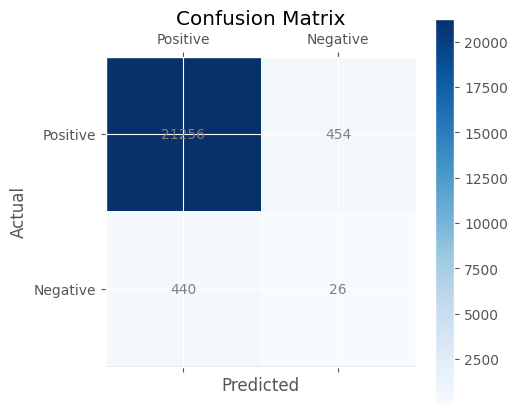

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Explicitly set the tick positions
ax.set_xticks(np.arange(conf_matrix.shape[1]))
ax.set_yticks(np.arange(conf_matrix.shape[0]))

# Then, set the tick labels
ax.set_xticklabels(["Positive", "Negative"])
ax.set_yticklabels(["Positive", "Negative"])

# Display the numbers on the colors
for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f"{val}", ha="center", va="center", color="Grey")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()